<a href="https://colab.research.google.com/github/hirossk/khs/blob/main/%E5%80%B6%E7%9F%A5%E5%AE%89%E9%AB%98%E6%A0%A1%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%83%BB%E6%83%85%E5%A0%B1%E2%85%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 倶知安高校（データ分析基礎） 情報Ⅱ

今日はデータ分析の基礎について考え方や取り組みについて様々な角度で考えてみましょう。

## 独立行政法人 統計センターによる教育用データを使います

教育用標準データセット

https://www.nstac.go.jp/use/literacy/ssdse/


データの解説はこちらを参照してください。

https://www.nstac.go.jp/sys/files/kaisetsu-A-2024.pdf

データの形式は次のようなものになります。

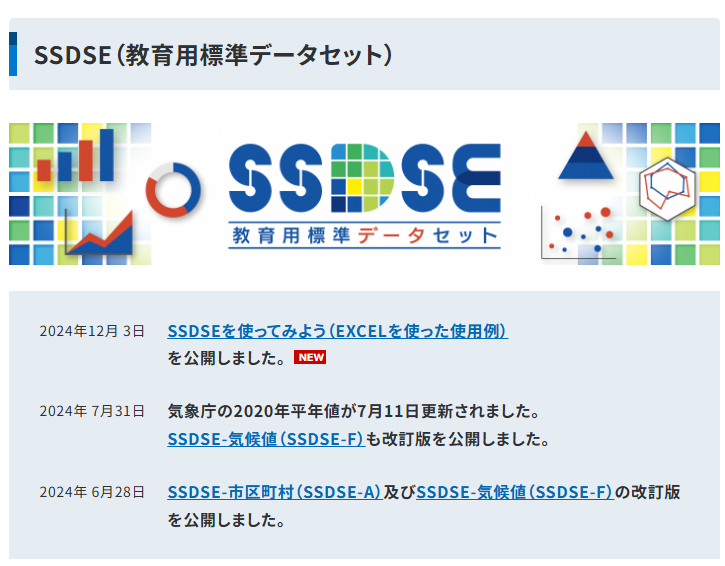

## データ分析のための環境設定

データ分析ではグラフを利用します。
グラフを利用するためのライブラリを読み込みます。

In [1]:
# 必要なライブラリの読み込み
!pip install japanize_matplotlib
import japanize_matplotlib

import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c24c4d64c6afbc42bc58d53ed0080baacd93d7e4d8d81f7b45a02aa8ec1c6854
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


### グラフを表示してみよう

プログラムで簡単にグラフを表示できることを確認しましょう。

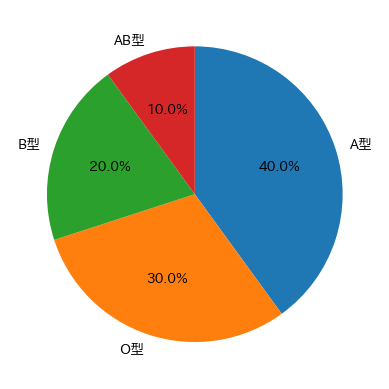

In [2]:
import matplotlib.pyplot as plt
# 円グラフ（プログラムでグラフを表示）
# 開始位置の設定とラベル付けを行う
# plt.pie([40 ,30 ,20 ,10],startangle=90, labels = ['A型','O型','B型','AB型'] )
# 表示を時計回りにして割合も出しましょう
plt.pie([40 ,30 ,20 ,10],startangle=90, labels = ['A型','O型','B型','AB型'] ,
        autopct="%1.1f%%",counterclock=False)

plt.show()

# 相関分析で「町の姿」を多角的に見る

一つのデータだけでは分からないことも、二つのデータを組み合わせる（相関を見る）ことで、町の姿がより立体的に見えてきます。

ここでは、いくつかの分析の切り口（分析軸）を例に、倶知安町の現状を探っていきましょう。皆さんの関心に合わせて、色々な軸で分析してみてください。

* **分析軸の例1：`転入者数（日本人移動者）割合`**
    * **探究の問い：** どのような特徴を持つ町に、人は移り住んでくる傾向があるのだろうか？

* **分析軸の例2：`従業者数（民営）（宿泊業、飲食サービス業）割合`**
    * **探究の問い：** 倶知安町の強みである「観光業」は、町の他の側面にどのような影響を与えているのだろうか？（例：人口構成、他の産業との関係など）

* **分析軸の3：`年少人口割合`**
    * **探究の問い：** 若い世代の人口割合は、どのような社会経済的な指標と関係が深いのだろうか？

もう少し説得力を付けるために、人口減少に歯止めがかかっている地域もしくは人口減少の幅が小さい地域を見つけたい。

倶知安町の特徴を分析してみると？

*   人口が同じような地域
*   人口の流入が多い地域



# データ分析を始めましょう

## このデータをもとに相関関係を導き出してみましょう

### 相関関係とは？

相関関係とはなんでしょうか。
相関関係 って、ちょっと難しい言葉だけど、簡単に言うと**「2つのものが、お互いに影響し合っているような関係」**のことです。

例

勉強時間とテストの点数
勉強時間を増やせば、テストの点数がよくなることが多いです。
アイスクリームの売り上げと気温
天気が暑いと、アイスクリームがよく売れるのは理解できると思います。
このように、あるものが変わると、別のものも変わるような関係のことを、相関関係といいます。

例　気温とアイスクリームの売り上げのグラフを作成する


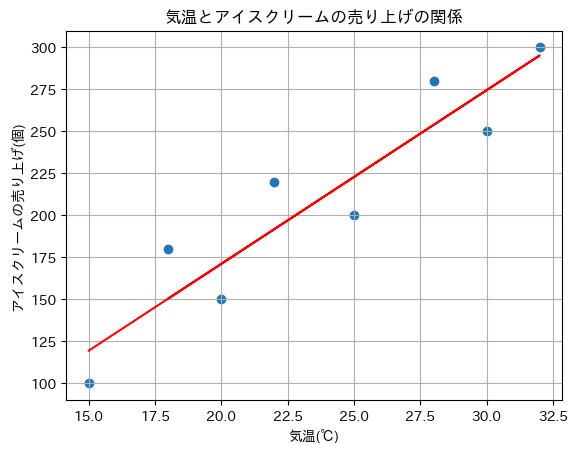

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# データの作成
temperature = np.array([15, 20, 25, 30, 32, 28, 22, 18])
sales = np.array([100, 150, 200, 250, 300, 280, 220, 180])

# データを2次元配列に変換
X = temperature.reshape(-1, 1)
y = sales

# 線形回帰モデルの作成
model = LinearRegression()
model.fit(X, y)

# 予測値の計算
y_pred = model.predict(X)

# 散布図の作成
plt.scatter(temperature, sales)

# 回帰直線の描画
plt.plot(temperature, y_pred, color='red')

# グラフの装飾
plt.xlabel('気温(℃)')
plt.ylabel('アイスクリームの売り上げ(個)')
plt.title('気温とアイスクリームの売り上げの関係')
plt.grid(True)
plt.show()

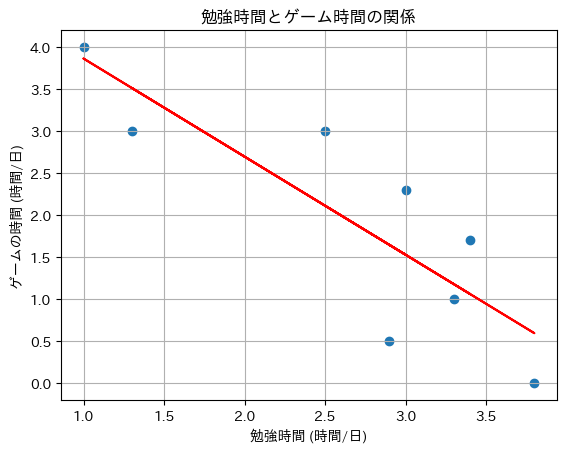

In [4]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 勉強時間（時間/日）
study_hours = np.array([2.5, 3, 1, 3.3, 3.8, 1.3, 3.4, 2.9])

# ゲームの時間（時間/日）
game_hours = np.array([3, 2.3, 4, 1, 0, 3, 1.7, 0.5])

# データを2次元配列に変換
X = study_hours.reshape(-1, 1)
y = game_hours

# 線形回帰モデルの作成と学習
model = LinearRegression()
model.fit(X, y)

# 予測値の計算
y_pred = model.predict(X)

# 散布図の作成
plt.scatter(study_hours, game_hours)

# 回帰直線の描画
plt.plot(study_hours, y_pred, color='red')

# グラフの装飾
plt.xlabel('勉強時間 (時間/日)')
plt.ylabel('ゲームの時間 (時間/日)')
plt.title('勉強時間とゲーム時間の関係')
plt.grid(True)
plt.show()

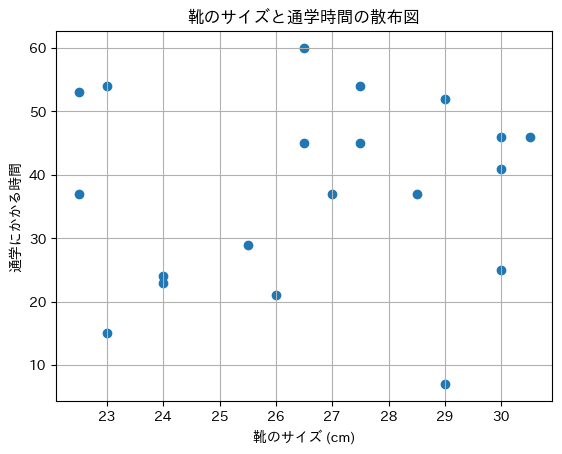

In [5]:
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt

# データの個数
num_data = 20

# 靴のサイズ（22cm～30cm）をランダムに生成
shoe_size = np.random.randint(44, 62, num_data) / 2.0

# 通学時間（5分～60分）をランダムに生成
income = np.random.randint(5, 61, num_data)

# 散布図を描画
plt.scatter(shoe_size, income)
plt.xlabel('靴のサイズ (cm)')
plt.ylabel('通学にかかる時間')
plt.title('靴のサイズと通学時間の散布図')
plt.grid(True)
plt.show()

この図のように、2つのデータをグラフにすると、相関関係が分かりやすくなります。

正の相関: 右上に向かって点が並ぶ。

負の相関: 左上に向かって点が並ぶ。

無相関: 点がバラバラに散らばる。

### 相関係数とは？

相関係数を用いて数値で表す
相関関係の強さを数値で表すために相関係数という指標が使われます。相関係数は-1から1までの値をとり、

1に近いほど強い正の相関

-1に近いほど強い負の相関

0に近いほど相関がない

ことを示します。


### 中央値とは？

央値とは、データを小さい順または大きい順に並べたときに真ん中に来る数のことです。

具体例
たとえば、次のようなテストの点数があったとします： 70点, 80点, 85点, 90点, 95点

点数を小さい順に並べます（この例はもう並んでいます）。
真ん中の数を見つけます。
この場合、真ん中は「85点」なので、これが中央値となります。


# 実データを使ったデータ分析

## データをダウンロードしましょう。

SSDSEサイトからデータをダウンロードします。

In [6]:
# データのダウンロードと読み込みと必要なモジュールの準備
!mkdir csv
!wget -P csv/ https://www.nstac.go.jp/sys/files/SSDSE-A-2024.csv


--2025-06-19 19:46:57--  https://www.nstac.go.jp/sys/files/SSDSE-A-2024.csv
Resolving www.nstac.go.jp (www.nstac.go.jp)... 52.193.216.17, 54.150.207.32
Connecting to www.nstac.go.jp (www.nstac.go.jp)|52.193.216.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 941334 (919K) [text/csv]
Saving to: ‘csv/SSDSE-A-2024.csv’

SSDSE-A-2024.csv    100%[===================>] 919.27K  1.21MB/s    in 0.7s    

2025-06-19 19:46:59 (1.21 MB/s) - ‘csv/SSDSE-A-2024.csv’ saved [941334/941334]



### データの前処理１（データの絞り込み）

データを北海道地区に限定し、人口を倶知安町と比較的近いところに絞り込みます。
絞り込んだ後のデータの件数を表示します。

In [21]:
# このデータを総人口に対する各項目の割合を求め追加する。

import warnings
import pandas as pd
import seaborn as sns

# 警告を抑制
warnings.simplefilter('ignore')

df = pd.read_csv('csv/SSDSE-A-2024.csv', encoding="shift-jis", skiprows=[0,1])

# 北海道のみで抽出
df = df[df['都道府県'] == '北海道']
# 人口で絞り込み1万人以上2万人以下の市区町村で絞り込み
df = df[((df['総人口'] >= 5000) & (df['総人口'] <= 20000))]

# 全ての総人口に対する割合を計算
all_columns = df.columns.tolist()

# 全ての総人口に対する割合を計算
for col in all_columns:
    if col != '総人口' and not col.endswith('割合'):
        # 数値に変換可能な要素のみ計算
        df[col + '割合'] = pd.to_numeric(df[col], errors='coerce') / df['総人口']

# データの件数を表示する

print('絞り込み後のデータは',len(df), '件')


絞り込み後のデータは 62 件


## データ分析の対象を決めよう

分析軸（data_axis と comparison）を自由に変更しながら試行錯誤してみましょう。

In [22]:
# ---【設定】ここを変えて色々分析してみよう！---
# 分析したい町の名前
target = '倶知安町'


## グラフ化する

都道府県
市区町村
総人口
総人口（男）割合
総人口（女）割合
日本人人口割合
日本人人口（男）割合
日本人人口（女）割合
15歳未満人口割合
15歳未満人口（男）割合
15歳未満人口（女）割合
15〜64歳人口割合
15〜64歳人口（男）割合
15〜64歳人口（女）割合
65歳以上人口割合
65歳以上人口（男）割合
65歳以上人口（女）割合
75歳以上人口割合
75歳以上人口（男）割合
75歳以上人口（女）割合
外国人人口割合
出生数割合
死亡数割合
転入者数（日本人移動者）割合
転出者数（日本人移動者）割合
世帯数割合
一般世帯数割合
一般世帯人員数割合
核家族世帯数割合
単独世帯数割合
65歳以上の世帯員のいる核家族世帯数割合
夫65歳以上、妻60歳以上の夫婦のみの世帯数割合
65歳以上世帯員の単独世帯数割合
婚姻件数割合
離婚件数割合
総面積（北方地域及び竹島を除く）割合
可住地面積割合
事業所数（民営）割合
事業所数（民営）（農業、林業）割合
事業所数（民営）（漁業）割合
事業所数（民営）（鉱業、採石業、砂利採取業）割合
事業所数（民営）（建設業）割合
事業所数（民営）（製造業）割合
事業所数（民営）（電気・ガス・熱供給・水道業）割合
事業所数（民営）（情報通信業）割合
事業所数（民営）（運輸業、郵便業）割合
事業所数（民営）（卸売業、小売業）割合
事業所数（民営）（金融業、保険業）割合
事業所数（民営）（不動産業、物品賃貸業）割合
事業所数（民営）（学術研究、専門・技術サービス業）割合
事業所数（民営）（宿泊業、飲食サービス業）割合
事業所数（民営）（生活関連サービス業、娯楽業）割合
事業所数（民営）（教育、学習支援業）割合
事業所数（民営）（医療、福祉）割合
事業所数（民営）（複合サービス事業）割合
事業所数（民営）（サービス業（他に分類されないもの））割合
従業者数（民営）割合
従業者数（民営）（農業、林業）割合
従業者数（民営）（漁業）割合
従業者数（民営）（鉱業、採石業、砂利採取業）割合
従業者数（民営）（建設業）割合
従業者数（民営）（製造業）割合
従業者数（民営）（電気・ガス・熱供給・水道業）割合
従業者数（民営）（情報通信業）割合
従業者数（民営）（運輸業、郵便業）割合
従業者数（民営）（卸売業、小売業）割合
従業者数（民営）（金融業、保険業）割合
従業者数（民営）（不動産業、物品賃貸業）割合
従業者数（民営）（学術研究、専門・技術サービス業）割合
従業者数（民営）（宿泊業、飲食サービス業）割合
従業者数（民営）（生活関連サービス業、娯楽業）割合
従業者数（民営）（教育、学習支援業）割合
従業者数（民営）（医療、福祉）割合
従業者数（民営）（複合サービス事業）割合
従業者数（民営）（サービス業（他に分類されないもの））割合
農家数（販売農家）割合
農家数（自給的農家）割合
一般行政部門職員数（市区町村）割合
経常収支比率（市町村財政）割合
実質公債費比率（市町村財政）割合
歳入決算総額（市町村財政）割合
地方税（市町村財政）割合
歳出決算総額（市町村財政）割合
民生費（市町村財政）割合
土木費（市町村財政）割合
教育費（市町村財政）割合
災害復旧費（市町村財政）割合
幼稚園数割合
幼稚園在園者数割合
小学校数割合
小学校教員数割合
小学校児童数割合
中学校数割合
中学校教員数割合
中学校生徒数割合
義務教育学校数割合
義務教育学校教員数割合
義務教育学校前期課程児童数割合
義務教育学校後期課程生徒数割合
高等学校数割合
高等学校生徒数割合
就業者数割合
就業者数（男）割合
就業者数（女）割合
完全失業者数割合
完全失業者数（男）割合
完全失業者数（女）割合
非労働力人口割合
非労働力人口（男）割合
非労働力人口（女）割合
第１次産業就業者数割合
第２次産業就業者数割合
第３次産業就業者数割合
公民館数割合
図書館数割合
総人口（非水洗化人口＋水洗化人口）割合
非水洗化人口割合
小売店数割合
飲食店数割合
大型小売店数割合
一般病院数割合
一般診療所数割合
歯科診療所数割合
医師数割合
歯科医師数割合
薬剤師数割合
保育所等数（基本票）割合
年少人口割合

In [27]:
# ---【設定】ここを変えて色々分析してみよう！---
# 分析したい町の名前
target = '倶知安町'
# Y軸（目的変数）：何との関係を見たいか？
data_axis = '従業者数（民営）（宿泊業、飲食サービス業）割合'
# X軸（説明変数）：何が影響していると仮説を立てるか？
comparison_axis = '外国人人口割合'
# ------------------------------------------------
# 一般行政部門職員数（市区町村）割合
# 転入者数（日本人移動者）割合
# 従業者数（民営）（宿泊業、飲食サービス業）割合

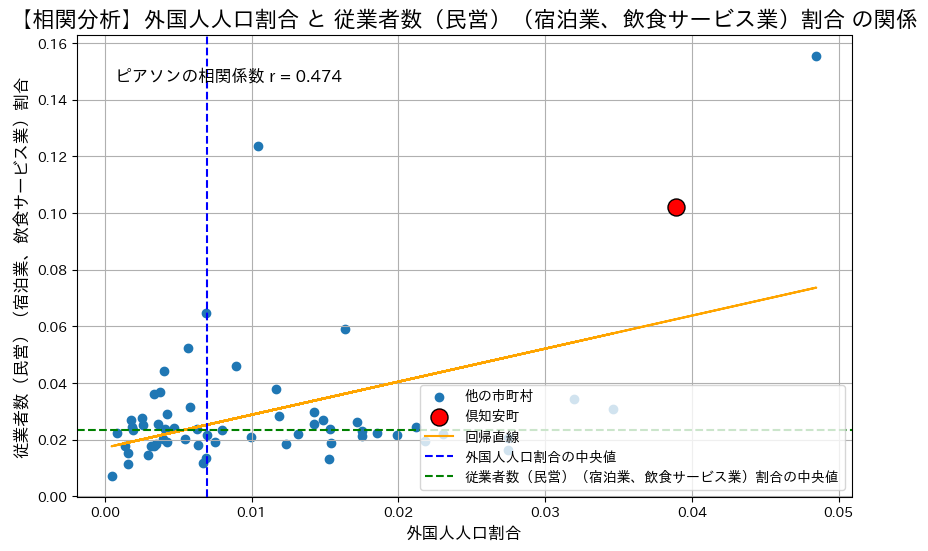

ピアソンの相関係数: 0.4742
p値: 0.0001
回帰直線の式: y = 1.165x + 0.017


In [28]:
# =======================================================================================
# 相関分析プログラム（色々な軸で試してみよう）
# =======================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# NaN（欠損値）が含まれる行を削除して、きれいなデータにする
df_cleaned = df.dropna(subset=[data_axis, comparison_axis])

# 説明変数(X)と目的変数(y)を設定
X = df_cleaned[[comparison_axis]] # 説明変数は2D配列にする
y = df_cleaned[data_axis]

# --- 分析と可視化 ---
# 相関係数とp値を計算
corr_coef, p_value = pearsonr(df_cleaned[comparison_axis], y)

# 回帰モデルを作成し、学習させる
model = LinearRegression()
model.fit(X, y)

# グラフの描画領域を作成
plt.figure(figsize=(10, 6))

# 散布図をプロット
plt.scatter(X, y, label='他の市町村')

# 倶知安町のデータポイントを抽出して強調表示
target_data = df_cleaned[df_cleaned['市区町村'] == target]
if not target_data.empty:
    plt.scatter(target_data[comparison_axis], target_data[data_axis], s=150, c='red', ec='black', label=target, zorder=5)

# 回帰直線をプロット
plt.plot(X, model.predict(X), color='orange', label='回帰直線')

# 中央値の線を追加
median_x = df_cleaned[comparison_axis].median()
median_y = df_cleaned[data_axis].median()
plt.axvline(x=median_x, color='blue', linestyle='--', label=f'{comparison_axis}の中央値')
plt.axhline(y=median_y, color='green', linestyle='--', label=f'{data_axis}の中央値')

# グラフの装飾
plt.title(f'【相関分析】{comparison_axis} と {data_axis} の関係', fontsize=16)
plt.xlabel(comparison_axis, fontsize=12)
plt.ylabel(data_axis, fontsize=12)
# 凡例を右下に出力
plt.legend(loc='lower right')
plt.grid(True)

# 相関係数をグラフ内に表示
plt.text(0.05, 0.9, f"ピアソンの相関係数 r = {corr_coef:.3f}", transform=plt.gca().transAxes, fontsize=12)

plt.show()

# 分析結果のテキスト出力
print(f"ピアソンの相関係数: {corr_coef:.4f}")
print(f"p値: {p_value:.4f}")
print(f"回帰直線の式: y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}")

## 回帰分析とは？

回帰分析は、**「あるものが変わると、別のものがどう変わるかを調べる方法」**です。

たとえば、次のようなことを考えてみましょう。

たくさん勉強するとテストの点数が上がるのか？
身長が高いと、バスケットボールがうまくなるのか？
早く寝ると、次の日元気になるのか？
このように、**「一つのものが変わると、別のものにどんな影響があるか」**を知りたいときに、回帰分析が役立ちます。

回帰分析でわかること
**回帰分析を使うと、次のようなことがわかります。**

* 勉強時間が1時間増えると、テストの点数が何点上がるか？
* 勉強時間が全然ないとき、だいたい何点くらいになるか？

これを使うことで、未来の結果を予測したり、どのくらい頑張れば目標に到達できるかを考えるのに役立てます。


散布図から人口と若年層割合の傾向を分析するために回帰分析を行ってみましょう。

回帰係数： [[1.1653132]]
切片： [0.01717966]
決定係数： 0.22483566766882168


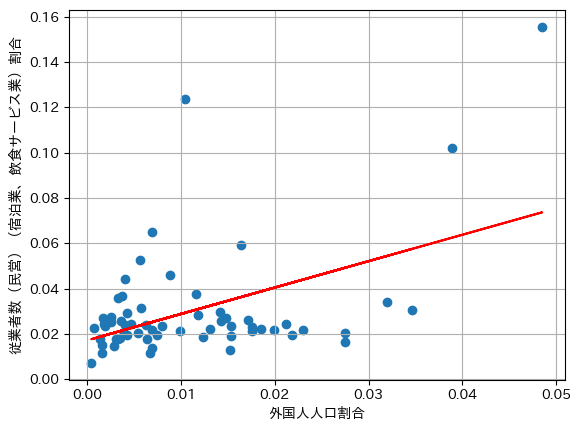

In [29]:
from sklearn import linear_model
import matplotlib.pyplot as plt
# 回帰分析を行うときの準備です
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df_cleaned.loc[:, [comparison_axis]].to_numpy()
y = df_cleaned.loc[:, [data_axis]].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel(data_axis)
plt.xlabel(comparison_axis)
# 直線の色を赤に変更
plt.plot(x, reg.predict(x), color='red')  # color='red' を追加
plt.grid(True)

### 回帰係数

回帰係数が直線の傾きを表します。

回帰係数とは何か？

回帰分析では、「回帰係数」という数字を使って、**「何かが1単位変わると、別のものがどれくらい変わるか」**を教えてくれます。



### 切片

その直線が縦軸と交わるところが「切片」です。ここでは総人口が人口が０を想定した時の若年層割合という意味になります。（数学的には0で割ることはできないので解なしとなります）

### 決定係数

決定係数は、データの中で「どれくらい回帰分析の線（直線や曲線）がそのデータにうまく当てはまっているか」を教えてくれる数字です。簡単に言うと、決定係数が高いほど、その分析がデータの動きをよく説明しているということになります。
決定係数は0 ～ 1の範囲の値となります。

データのカラムから総人口と関係の深い項目を探してみましょう。

## 分析のまとめと次のステップ

これまでのデータ分析から、倶知安町について以下の客観的な事実（ファクト）が明らかになりました。

* **事実1：産業構造の特化**
    * K-meansクラスタリング分析の結果、倶知安町は他の多くの市町村とは異なる「観光リゾート型」の産業構造を持つことが明確になった。

* **事実2：〇〇と△△の相関関係**
    * 相関分析の結果、北海道の人口5千～2万人規模の市町村では、〇〇（例：出生数割合）と△△（例：年少人口割合）には強い正の相関が見られた。（※自分たちの分析結果を記述する）

* **事実3：倶知安町の現在地**
    * 一方で、倶知安町は△△の指標が道内の同規模市町村の中央値と比較して低い（高い）という特徴が見られた。（※自分たちの分析結果を記述する）

#### **ここから考えられる「問い」と「課題」**

これらのデータから、私たちは倶知安町のどのような課題を見出すことができるでしょうか？

例えば、「町の経済的な強みである観光業を活かしつつ、住民、特に若い世代にとってより魅力的な町にしていくためには、どのような課題を乗り越える必要があるだろうか？」といった問いが生まれるかもしれません。

次のステップとして、これらのデータ分析の結果を元に、私たちが考える**「倶知安町の真の課題」**を定義し、その解決策を探究していきましょう。



# 最後に

✅ ライブラリの準備が完了しました。

✅ ファイル 'csv/SSDSE-A-2024.csv' の読み込みに成功しました。
✅ df_raw の1行目を削除し、新しい見出しを設定しました。
Index(['地域コード', '都道府県', '市区町村', '総人口', '総人口（男）', '総人口（女）', '日本人人口', '日本人人口（男）',
       '日本人人口（女）', '15歳未満人口',
       ...
       '小売店数', '飲食店数', '大型小売店数', '一般病院数', '一般診療所数', '歯科診療所数', '医師数', '歯科医師数',
       '薬剤師数', '保育所等数（基本票）'],
      dtype='object', name=1, length=128)

✅ データの前処理（お掃除と計算）が完了しました。
--- 分析用データ ---
1   municipality  total_workers  hotel_restaurant_workers  \
57          ニセコ町           2623                       789   
140         洞爺湖町           3972                      1044   
62          倶知安町           8009                      1546   
28          富良野市          10779                      1266   
2            小樽市          44785                      4112   
0            札幌市         845953                     76435   
70           余市町           8136                       390   

1    hotel_restaurant_ratio(%)  
57                      30.080  
140                     26.284  
62

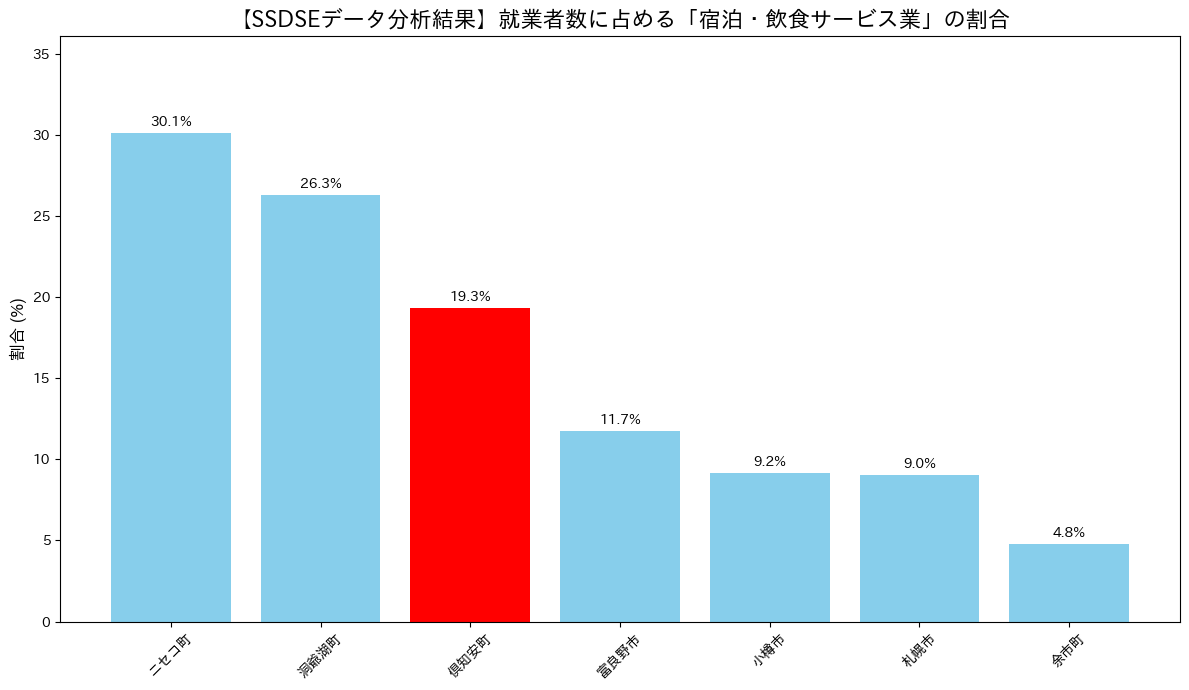


【グラフからわかること】




In [30]:
# =======================================================================================
# SSDSE-A-2024.csv 分析プログラム（産業構造編）
# =======================================================================================
#
# 目的：
# Google ColabにアップロードしたSSDSEのCSVファイルを使い、倶知安町の産業構造を分析します。
# 「宿泊業、飲食サービス業」で働く人の割合を他の市町村と比較することで、
# その観光リゾートとしての特性をデータで明らかにします。
#
# =======================================================================================


# ---------------------------------------------------------------------------------------
# ステップ1：準備（ライブラリのインポート）
# ---------------------------------------------------------------------------------------
import pandas as pd
print("✅ ライブラリの準備が完了しました。")


# ---------------------------------------------------------------------------------------
# ステップ2：アップロードしたCSVファイルを読み込む
# ---------------------------------------------------------------------------------------
# ファイル名は、アップロードしたファイルに合わせてください。
file_name = 'csv/SSDSE-A-2024.csv'

try:
    # 日本語のCSVなので、エンコーディングを 'cp932' (Shift_JIS) に指定します。
    df_raw = pd.read_csv(file_name, encoding='cp932')
    print(f"\n✅ ファイル '{file_name}' の読み込みに成功しました。")

except FileNotFoundError:
    print(f"❌ エラー: ファイル '{file_name}' が見つかりません。")
    print("Colabにファイルが正しくアップロードされているか確認してください。")
except Exception as e:
    print(f"❌ データの読み込み中にエラーが発生しました: {e}")

# df_rawの一行目を削除してデータの見出しを設定する
if 'df_raw' in locals():
    # 1行目を削除し、2行目（インデックス1）を新しいヘッダーとして使用
    df_raw = df_raw.iloc[1:].copy()
    df_raw.columns = df_raw.iloc[0]
    df_raw = df_raw[1:].reset_index(drop=True)
    print("✅ df_raw の1行目を削除し、新しい見出しを設定しました。")


# ---------------------------------------------------------------------------------------
# ステップ3：データの前処理（分析しやすいようにデータを整理する）
# ---------------------------------------------------------------------------------------
# SSDSEのデータ項目コードに基づき、必要な列だけを抽出します。
# 市区町村名
# 15歳以上就業者数 総数
# 宿泊業，飲食サービス業（就業者数）の就業者数

print(df_raw.columns)
columns_to_use = {
    '市区町村': 'municipality',
    '就業者数': 'total_workers',
    '従業者数（民営）（宿泊業、飲食サービス業）': 'hotel_restaurant_workers'
}
df_selected = df_raw[columns_to_use.keys()].copy()
df_selected = df_selected.rename(columns=columns_to_use)


# 分析に必要な市町村をリストアップ
target_cities = ['倶知安町', '札幌市', '小樽市', 'ニセコ町', '富良野市', '余市町','洞爺湖町']

# リストアップした市町村のデータだけを抽出
df_target = df_selected[df_selected['municipality'].isin(target_cities)].copy()

# SSDSEのデータでは、値がない場合に'-'が入っているため、それを数値の0に置き換えます。
for col in ['total_workers', 'hotel_restaurant_workers']:
    df_target[col] = pd.to_numeric(df_target[col].replace('-', '0'), errors='coerce')

# 分析用の新しい列「宿泊・飲食業の割合(%)」を追加
# 0で割るエラーを避けるため、total_workersが0の場合は割合も0とします。
df_target['hotel_restaurant_ratio(%)'] = \
    df_target.apply(lambda row: (row['hotel_restaurant_workers'] / row['total_workers']) * 100
                    if row['total_workers'] > 0 else 0, axis=1)

# 分析結果を割合の高い順に並び替え
df_analysis = df_target.sort_values('hotel_restaurant_ratio(%)', ascending=False)


print("\n✅ データの前処理（お掃除と計算）が完了しました。")
print("--- 分析用データ ---")
print(df_analysis)


# ---------------------------------------------------------------------------------------
# ステップ4：データの分析と可視化（グラフ作成）
# ---------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 7))

# 自治体ごとの割合を棒グラフで表示
bars = ax.bar(df_analysis['municipality'], df_analysis['hotel_restaurant_ratio(%)'],
              color=['red' if city == '倶知安町' else 'skyblue' for city in df_analysis['municipality']])

# グラフのタイトルやラベルを設定
ax.set_title('【SSDSEデータ分析結果】就業者数に占める「宿泊・飲食サービス業」の割合', fontsize=16, fontweight='bold')
ax.set_ylabel('割合 (%)', fontsize=12)
ax.set_ylim(0, df_analysis['hotel_restaurant_ratio(%)'].max() * 1.2)
plt.xticks(rotation=45)

# グラフの上に数値ラベルを表示
ax.bar_label(bars, fmt='%.1f%%', padding=3)

fig.tight_layout()
plt.show()


# ---------------------------------------------------------------------------------------
# ステップ5：分析結果の考察
# ---------------------------------------------------------------------------------------
print("""
【グラフからわかること】

""")

In [ ]:
# =======================================================================================
# SSDSE-A-2024.csv 分析プログラム（産業構造編）
# =======================================================================================
#
# 目的：
# Google ColabにアップロードしたSSDSEのCSVファイルを使い、倶知安町の産業構造を分析します。
# 「宿泊業、飲食サービス業」で働く人の割合を他の市町村と比較することで、
# その観光リゾートとしての特性をデータで明らかにします。
#
# =======================================================================================


# ---------------------------------------------------------------------------------------
# ステップ1：準備（ライブラリのインポート）
# ---------------------------------------------------------------------------------------
import pandas as pd
print("✅ ライブラリの準備が完了しました。")


# ---------------------------------------------------------------------------------------
# ステップ2：アップロードしたCSVファイルを読み込む
# ---------------------------------------------------------------------------------------
# ファイル名は、アップロードしたファイルに合わせてください。
file_name = 'csv/SSDSE-A-2024.csv'

try:
    # 日本語のCSVなので、エンコーディングを 'cp932' (Shift_JIS) に指定します。
    df_raw = pd.read_csv(file_name, encoding='cp932')
    print(f"\n✅ ファイル '{file_name}' の読み込みに成功しました。")

except FileNotFoundError:
    print(f"❌ エラー: ファイル '{file_name}' が見つかりません。")
    print("Colabにファイルが正しくアップロードされているか確認してください。")
except Exception as e:
    print(f"❌ データの読み込み中にエラーが発生しました: {e}")

# df_rawの一行目を削除してデータの見出しを設定する
if 'df_raw' in locals():
    # 1行目を削除し、2行目（インデックス1）を新しいヘッダーとして使用
    df_raw = df_raw.iloc[1:].copy()
    df_raw.columns = df_raw.iloc[0]
    df_raw = df_raw[1:].reset_index(drop=True)
    print("✅ df_raw の1行目を削除し、新しい見出しを設定しました。")


# ---------------------------------------------------------------------------------------
# ステップ3：データの前処理（分析しやすいようにデータを整理する）
# ---------------------------------------------------------------------------------------
# SSDSEのデータ項目コードに基づき、必要な列だけを抽出します。
# 市区町村名
# 15歳以上就業者数 総数
# 宿泊業，飲食サービス業（就業者数）の就業者数

print(df_raw.columns)
columns_to_use = {
    '市区町村': 'municipality',
    '総人口': 'population',
    '外国人人口': 'foreign_population'
}
df_selected = df_raw[columns_to_use.keys()].copy()
df_selected = df_selected.rename(columns=columns_to_use)


# 分析に必要な市町村をリストアップ
target_cities = ['倶知安町', '札幌市', '小樽市', 'ニセコ町', '富良野市', '余市町','洞爺湖町']

# リストアップした市町村のデータだけを抽出
df_target = df_selected[df_selected['municipality'].isin(target_cities)].copy()

# SSDSEのデータでは、値がない場合に'-'が入っているため、それを数値の0に置き換えます。
for col in ['population', 'foreign_population']:
    df_target[col] = pd.to_numeric(df_target[col].replace('-', '0'), errors='coerce')

# 分析用の新しい列「宿泊・飲食業の割合(%)」を追加
# 0で割るエラーを避けるため、total_workersが0の場合は割合も0とします。
df_target['foreign_population_ratio(%)'] = \
    df_target.apply(lambda row: (row['foreign_population'] / row['population']) * 100
                    if row['population'] > 0 else 0, axis=1)

# 分析結果を割合の高い順に並び替え
df_analysis = df_target.sort_values('foreign_population_ratio(%)', ascending=False)


print("\n✅ データの前処理（お掃除と計算）が完了しました。")
print("--- 分析用データ ---")
print(df_analysis)


# ---------------------------------------------------------------------------------------
# ステップ4：データの分析と可視化（グラフ作成）
# ---------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 7))

# 自治体ごとの割合を棒グラフで表示
bars = ax.bar(df_analysis['municipality'], df_analysis['foreign_population_ratio(%)'],
              color=['red' if city == '倶知安町' else 'skyblue' for city in df_analysis['municipality']])

# グラフのタイトルやラベルを設定
ax.set_title('【SSDSEデータ分析結果】就業者数に占める「宿泊・飲食サービス業」の割合', fontsize=16, fontweight='bold')
ax.set_ylabel('割合 (%)', fontsize=12)
ax.set_ylim(0, df_analysis['foreign_population_ratio(%)'].max() * 1.2)
plt.xticks(rotation=45)

# グラフの上に数値ラベルを表示
ax.bar_label(bars, fmt='%.1f%%', padding=3)

fig.tight_layout()
plt.show()


# ---------------------------------------------------------------------------------------
# ステップ5：分析結果の考察
# ---------------------------------------------------------------------------------------
print("""
【グラフからわかること】

""")